In [1]:
import tensorflow as tf

In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
pwd

'/content/drive/MyDrive/ML'

In [6]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [7]:
pwd

'/content/drive/MyDrive/ML'

In [8]:
import pickle

data_link = "./data.p"

with open(data_link, mode='rb') as f:
  data = pickle.load(f)

In [ ]:
data

{'labels': array([ 0,  0,  0, ..., 42, 42, 42], dtype=int32),
 'pixels': array([[[[ 75,  78,  80],
          [ 73,  76,  78],
          [ 82,  84,  83],
          ...,
          [ 67,  74,  73],
          [ 65,  68,  67],
          [ 66,  67,  66]],
 
         [[ 83,  84,  86],
          [ 79,  80,  82],
          [ 85,  86,  83],
          ...,
          [ 73,  77,  77],
          [ 76,  78,  75],
          [ 79,  79,  77]],
 
         [[ 79,  79,  81],
          [ 84,  84,  85],
          [ 86,  87,  87],
          ...,
          [ 71,  74,  72],
          [ 75,  74,  70],
          [ 79,  78,  75]],
 
         ...,
 
         [[128, 130, 136],
          [120, 125, 131],
          [109, 119, 124],
          ...,
          [ 97,  97,  92],
          [ 99, 102,  94],
          [ 99, 104, 100]],
 
         [[ 89,  93,  97],
          [ 91,  97, 102],
          [ 76,  86,  91],
          ...,
          [105, 104,  97],
          [109, 113, 104],
          [ 96, 104,  97]],
 
         [[ 

In [9]:
pixels = data['pixels']
labels = data['labels']

In [ ]:
pixels

array([[[[ 75,  78,  80],
         [ 73,  76,  78],
         [ 82,  84,  83],
         ...,
         [ 67,  74,  73],
         [ 65,  68,  67],
         [ 66,  67,  66]],

        [[ 83,  84,  86],
         [ 79,  80,  82],
         [ 85,  86,  83],
         ...,
         [ 73,  77,  77],
         [ 76,  78,  75],
         [ 79,  79,  77]],

        [[ 79,  79,  81],
         [ 84,  84,  85],
         [ 86,  87,  87],
         ...,
         [ 71,  74,  72],
         [ 75,  74,  70],
         [ 79,  78,  75]],

        ...,

        [[128, 130, 136],
         [120, 125, 131],
         [109, 119, 124],
         ...,
         [ 97,  97,  92],
         [ 99, 102,  94],
         [ 99, 104, 100]],

        [[ 89,  93,  97],
         [ 91,  97, 102],
         [ 76,  86,  91],
         ...,
         [105, 104,  97],
         [109, 113, 104],
         [ 96, 104,  97]],

        [[ 85,  84,  87],
         [ 96, 101, 106],
         [ 67,  80,  85],
         ...,
         [103, 104,  95],
        

In [10]:
pixels.shape

(39209, 32, 32, 3)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [12]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(25093, 32, 32, 3) (6274, 32, 32, 3) (7842, 32, 32, 3) (25093,) (6274,) (7842,)


In [13]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_val, y_val = shuffle(X_val, y_val)
X_test, y_test = shuffle(X_test, y_test)

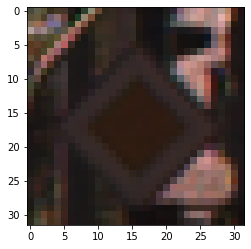

In [14]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2])

In [15]:
classNames = ['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing by vehicles over 3.5 metric tons']

In [ ]:
classNames[y_val[1]]

'Priority road'

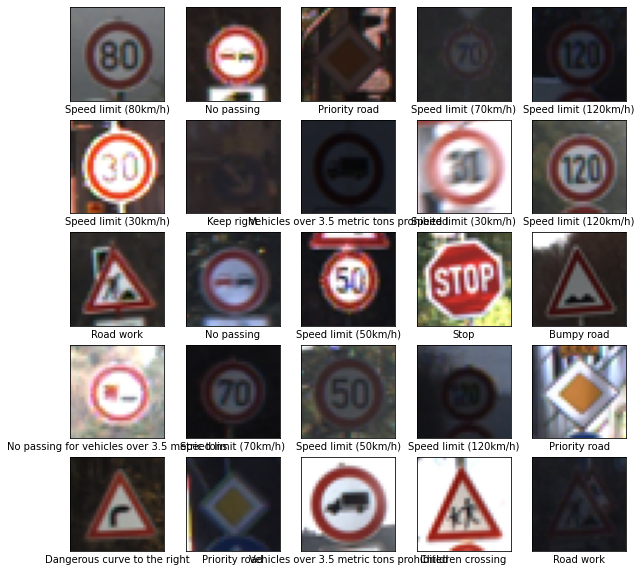

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classNames[y_train[i]])
plt.show()

In [17]:
X_train = X_train.astype("float") / 255.0
X_val = X_val.astype("float") / 255.0
X_test = X_test.astype("float") / 255.0

In [18]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = y_train.reshape((y_train.shape[0], 1))
y_val = y_val.reshape((y_val.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)
y_test = lb.fit_transform(y_test)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

learning_rate = 1e-2
batch_size = 64
num_epochs = 30

In [ ]:
learning_rate = 1e-2
batch_size = 64
num_epochs = 30

In [ ]:
width = 32
height = 32
classes = 43

In [ ]:
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32, (3 , 3), padding='same', input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes))

model.add(Activation("softmax"))

In [ ]:
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

In [ ]:
aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

opt = SGD(lr=learning_rate, momentum=0.9, decay=learning_rate / num_epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

H = model.fit_generator(aug.flow(X_train,y_train,batch_size=batch_size),validation_data=(X_val,y_val),steps_per_epoch=X_train.shape[0]//batch_size,epochs=num_epochs,verbose=1)

In [ ]:
opt = SGD(lr=learning_rate, momentum=0.9, decay=learning_rate / num_epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
print("Start Training...")
H = model.fit_generator(aug.flow(X_train, y_train, batch_size=batch_size), validation_data=(X_val, y_val), steps_per_epoch=X_train.shape[0] // batch_size, epochs=num_epochs, verbose=1)

Start Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
392/392 [==============================] - 180s 454ms/step - loss: 3.0761 - accuracy: 0.2217 - val_loss: 2.2630 - val_accuracy: 0.2968
Epoch 2/30
392/392 [==============================] - 178s 453ms/step - loss: 1.8487 - accuracy: 0.4388 - val_loss: 1.3336 - val_accuracy: 0.5700
Epoch 3/30
392/392 [==============================] - 176s 449ms/step - loss: 1.2929 - accuracy: 0.5787 - val_loss: 0.7224 - val_accuracy: 0.7533
Epoch 4/30
392/392 [==============================] - 176s 450ms/step - loss: 0.9674 - accuracy: 0.6809 - val_loss: 0.5512 - val_accuracy: 0.8204
Epoch 5/30
392/392 [==============================] - 177s 450ms/step - loss: 0.7160 - accuracy: 0.7634 - val_loss: 0.3420 - val_accuracy: 0.8875
Epoch 6/30
392/392 [==============================] - 177s 451ms/step - loss: 0.5644 - accuracy: 0.8082 - val_loss: 0.3372 - val_accuracy: 0.8825
Epoch 7/30
392/392 [==============================] - 177s 452ms/step - loss: 0.4563 - accuracy: 0.8473 - val_loss: 0.1865 -

In [ ]:
model.save("da3.h5")

In [20]:
model.evaluate(X_test, y_test)

NameError: ignored

In [21]:
saved_model = tf.keras.models.load_model("da3.h5")

In [61]:
result = saved_model.predict(X_test[2016:2017])

In [31]:
result

array([[9.88835347e-10, 7.62564789e-14, 2.08682013e-11, 4.65775614e-08,
        1.31132882e-09, 3.34895875e-13, 3.48122383e-13, 1.38441632e-16,
        2.61981149e-11, 1.15879520e-11, 1.20079675e-11, 3.32494543e-09,
        1.34415092e-12, 2.48792024e-12, 2.31957964e-09, 6.70760947e-10,
        1.54606674e-16, 2.48403972e-13, 7.60556507e-09, 4.82326290e-10,
        8.03874411e-10, 6.42090514e-09, 1.49327352e-05, 1.08651461e-08,
        4.52857591e-07, 9.99832034e-01, 1.15821490e-06, 1.51177737e-04,
        2.49974512e-08, 2.37564333e-08, 1.17136068e-09, 6.95536855e-08,
        6.46046042e-13, 5.25228992e-12, 1.63388183e-12, 3.05047809e-09,
        5.59848218e-12, 1.18434897e-11, 3.46983388e-14, 3.92745190e-14,
        3.86299890e-12, 1.85754542e-13, 9.77140490e-16]], dtype=float32)

In [24]:
import numpy as np

In [ ]:
# final = np.argmax(result)
# final = classNames[final]

In [ ]:
final

'Wild animals crossing'

accuracy:  0.9998005
sign name: Ahead only


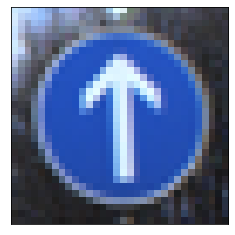

In [62]:
plt.figure(figsize=(4,4))
# plt.subplot(5,5,i+1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_test[2016], cmap=plt.cm.binary)
print("accuracy:  " + str(np.max(result)))
print("sign name: " + classNames[np.argmax(result)])